# Classification Exercise

We'll be working with some California Census Data, we'll be trying to use various features of an individual to predict what class of income they belogn in (>50k or <=50k). 

Here is some information about the data:

<table>
<thead>
<tr>
<th>Column Name</th>
<th>Type</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>age</td>
<td>Continuous</td>
<td>The age of the individual</td>
</tr>
<tr>
<td>workclass</td>
<td>Categorical</td>
<td>The type of employer the  individual has (government,  military, private, etc.).</td>
</tr>
<tr>
<td>fnlwgt</td>
<td>Continuous</td>
<td>The number of people the census  takers believe that observation  represents (sample weight). This  variable will not be used.</td>
</tr>
<tr>
<td>education</td>
<td>Categorical</td>
<td>The highest level of education  achieved for that individual.</td>
</tr>
<tr>
<td>education_num</td>
<td>Continuous</td>
<td>The highest level of education in  numerical form.</td>
</tr>
<tr>
<td>marital_status</td>
<td>Categorical</td>
<td>Marital status of the individual.</td>
</tr>
<tr>
<td>occupation</td>
<td>Categorical</td>
<td>The occupation of the individual.</td>
</tr>
<tr>
<td>relationship</td>
<td>Categorical</td>
<td>Wife, Own-child, Husband,  Not-in-family, Other-relative,  Unmarried.</td>
</tr>
<tr>
<td>race</td>
<td>Categorical</td>
<td>White, Asian-Pac-Islander,  Amer-Indian-Eskimo, Other, Black.</td>
</tr>
<tr>
<td>gender</td>
<td>Categorical</td>
<td>Female, Male.</td>
</tr>
<tr>
<td>capital_gain</td>
<td>Continuous</td>
<td>Capital gains recorded.</td>
</tr>
<tr>
<td>capital_loss</td>
<td>Continuous</td>
<td>Capital Losses recorded.</td>
</tr>
<tr>
<td>hours_per_week</td>
<td>Continuous</td>
<td>Hours worked per week.</td>
</tr>
<tr>
<td>native_country</td>
<td>Categorical</td>
<td>Country of origin of the  individual.</td>
</tr>
<tr>
<td>income</td>
<td>Categorical</td>
<td>"&gt;50K" or "&lt;=50K", meaning  whether the person makes more  than \$50,000 annually.</td>
</tr>
</tbody>
</table>

## Follow the Directions in Bold. If you get stuck, check out the solutions lecture.

### THE DATA

** Read in the census_data.csv data with pandas**

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [140]:
data_set=pd.read_csv("census_data.csv")

In [141]:
data_set.head(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


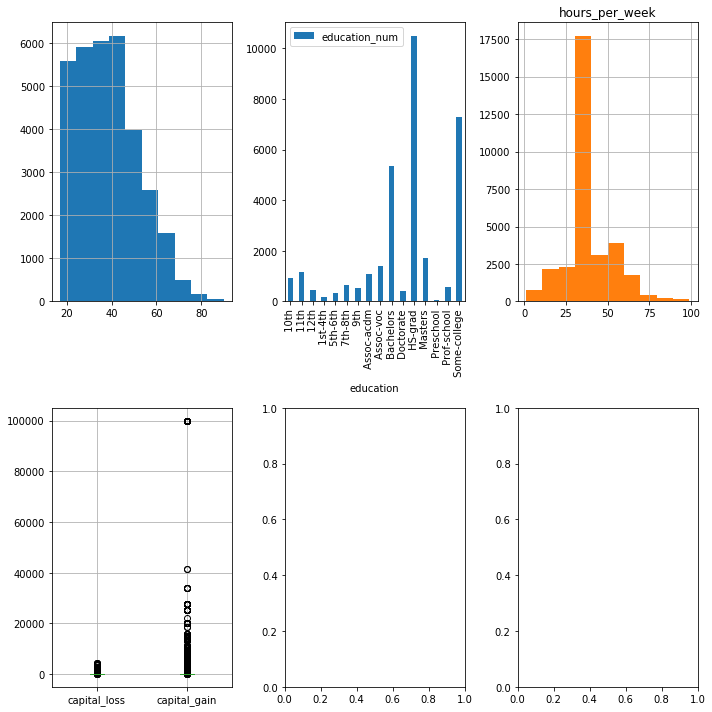

In [142]:
fig=plt.figure(figsize=(10,10))
((ax1,ax2,ax3),(ax4,ax5,ax6))= fig.subplots(2,3,sharex=False,sharey=False)
data_set['age'].hist(bins=10,ax=ax1)
#ax2=fig.add_subplot(112)
pd.DataFrame(data_set.groupby('education')['education_num'].count()).plot(kind='bar',ax=ax2)
data_set[['hours_per_week']].hist(bins=10,ax=ax3)
data_set[['capital_loss','capital_gain']].boxplot(ax=ax4)
data_set[['hours_per_week']].hist(bins=10,ax=ax3)
fig.tight_layout()
#fig.add_subplots()

** TensorFlow won't be able to understand strings as labels, you'll need to use pandas .apply() method to apply a custom function that converts them to 0s and 1s. This might be hard if you aren't very familiar with pandas, so feel free to take a peek at the solutions for this part.**

** Convert the Label column to 0s and 1s instead of strings.**

In [143]:
data_set['Income_range']= data_set['income_bracket'].apply(lambda x:0 if x==' <=50K' else 1)

In [144]:
data_set['income_bracket'].value_counts()

 <=50K    24720
 >50K      7841
Name: income_bracket, dtype: int64

In [145]:
X_data=data_set[[x for x in data_set.columns if x not in ['Income_range','income_bracket']]]

In [146]:
y_data=data_set[['Income_range']]

### Perform a Train Test Split on the Data

In [147]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.3,random_state=102)

### Create the Feature Columns for tf.esitmator

** Take note of categorical vs continuous values! **

In [148]:
X_data.columns
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
age               32561 non-null int64
workclass         32561 non-null object
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
gender            32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


** Import Tensorflow **

In [149]:
lst_object= [x for x in X_data.columns if X_data[x].dtype=='O']
lst_cont=[x for x in X_data.columns if X_data[x].dtype=='int']
for t in lst_object:
    print(list(map(lambda x: x.strip(),list(X_data[t].value_counts().index))))
print(lst_object)
print(lst_cont)

['Private', 'Self-emp-not-inc', 'Local-gov', '?', 'State-gov', 'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked']
['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc', '11th', 'Assoc-acdm', '10th', '7th-8th', 'Prof-school', '9th', '12th', 'Doctorate', '5th-6th', '1st-4th', 'Preschool']
['Married-civ-spouse', 'Never-married', 'Divorced', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse']
['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Other-service', 'Machine-op-inspct', '?', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing', 'Tech-support', 'Protective-serv', 'Priv-house-serv', 'Armed-Forces']
['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife', 'Other-relative']
['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
['Male', 'Female']
['United-States', 'Mexico', '?', 'Philippines', 'Germany', 'Canada', 'Puerto-Rico', 'El-Salvador', 'India', 'Cuba', 'England', 'Jamaica', 'South'

In [150]:
import tensorflow as tf
lst_workclass=[x.strip() for x in list(data_set['workclass'].value_counts().index)]
lst_ed= [x.strip() for x in list(data_set['education'].value_counts().index)]
lst_mar=[x.strip() for x in list(data_set['marital_status'].value_counts().index)]
lst_occ=[x.strip() for x in list(data_set['occupation'].value_counts().index)]
lst_rel=[x.strip() for x in list(data_set['relationship'].value_counts().index)]
lst_race=[x.strip() for x in list(data_set['race'].value_counts().index)]
lst_gen=[x.strip() for x in list(data_set['gender'].value_counts().index)]
lst_nc=[x.strip() for x in list(data_set['native_country'].value_counts().index)]
lst_var=[lst_workclass,lst_ed,lst_mar,lst_occ,lst_rel,lst_race,lst_gen,lst_nc]

** Create the tf.feature_columns for the categorical values. Use vocabulary lists or just use hash buckets. **

In [151]:
tf_wclass=tf.feature_column.categorical_column_with_vocabulary_list('workclass',vocabulary_list=lst_workclass)
#tf_wed=tf.feature_column.categorical_column_with_vocabulary_list('education',vocabulary_list=lst_ed)
tf_mar=tf.feature_column.categorical_column_with_vocabulary_list('marital_status',lst_mar)
tf_occ=tf.feature_column.categorical_column_with_vocabulary_list('occupation',lst_occ)
tf_rel=tf.feature_column.categorical_column_with_vocabulary_list('relationship',lst_rel)
tf_race=tf.feature_column.categorical_column_with_vocabulary_list('race',lst_race)
tf_gen=tf.feature_column.categorical_column_with_vocabulary_list('gender',lst_gen)
tf_nc=tf.feature_column.categorical_column_with_vocabulary_list('native_country',lst_nc)
#help(tf.feature_column.categorical_column_with_vocabulary_list)

** Create the continuous feature_columns for the continuous values using numeric_column **

In [152]:
tf_age=tf.feature_column.numeric_column('age') # convert this bucketed value
#tf_edu=tf.feature_column.numeric_column('education_num') # convert this to buckete
tf_age_buck=tf.feature_column.bucketized_column(tf_age,[20,30,40,50,60,70,80])
tf_cg= tf.feature_column.numeric_column('capital_gain')
tf_cl=tf.feature_column.numeric_column('capital_loss')
tf_hw= tf.feature_column.numeric_column('hours_per_week')
tf_hw_buck=tf.feature_column.bucketized_column(tf_hw,[20,40,60,80])

** Put all these variables into a single list with the variable name feat_cols **

In [172]:
feat_cols=[tf_wclass,tf_mar,tf_occ,tf_rel,tf_race,tf_gen,tf_nc,tf_age_buck,tf_cg,tf_cl,tf_hw_buck]
saver=tf.train.Saver()

RuntimeError: Graph is finalized and cannot be modified.

### Create Input Function

** Batch_size is up to you. But do make sure to shuffle!**

In [171]:
input_func=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=100,shuffle=True)


RuntimeError: Graph is finalized and cannot be modified.

#### Create your model with tf.estimator

**Create a LinearClassifier.(If you want to use a DNNClassifier, keep in mind you'll need to create embedded columns out of the cateogrical feature that use strings, check out the previous lecture on this for more info.)**

In [168]:
model_class=tf.estimator.LinearClassifier(feat_cols,n_classes=2)
saver.save(tf.session(),"models/srihari_ckpt.ckpt")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/rk/xb8jhz_541379hrhsnsd7vjm0000gp/T/tmpvyenkco6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a363086a0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


NameError: name 'saver' is not defined

** Train your model on the data, for at least 5000 steps. **

In [156]:
model_class.train(input_func,steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/rk/xb8jhz_541379hrhsnsd7vjm0000gp/T/tmp9irgexqs/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 151.622
INFO:tensorflow:loss = 6.07679, step = 101 (0.661 sec)
INFO:tensorflow:global_step/sec: 263.636
INFO:tensorflow:loss = 27.997667, step = 201 (0.379 sec)
INFO:tensorflow:global_step/sec: 271.738
INFO:tensorflow:loss = 61.784454, step = 301 (0.370 sec)
INFO:tensorflow:global_step/sec: 373.584
INFO:tensorflow:loss = 4.2357864, step = 401 (0.268 sec)
INFO:tensorflow:global_step/sec: 321.436
INFO:tensorflow:loss = 1.8590579, step = 501 (0.309 sec)
INFO:tensorflow:global_step/sec: 295.387
INFO:tensorflow:loss = 19.387966, step = 601 (0.339 sec)
INFO:tensorflow:

### Evaluation

** Create a prediction input function. Remember to only supprt X_test data and keep shuffle=False. **

In [163]:
model_class.evaluate(input_func,steps=1000)
input_pred_func=tf.estimator.inputs.pandas_input_fn(x=X_test,shuffle=False,num_epochs=1,batch_size=8)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-05-09:55:53
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/rk/xb8jhz_541379hrhsnsd7vjm0000gp/T/tmp9irgexqs/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-04-05-09:56:01
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.7803, accuracy_baseline = 0.755, auc = 0.7745977, auc_precision_recall = 0.5454146, average_loss = 0.7770443, global_step = 50

** Use model.predict() and pass in your input function. This will produce a generator of predictions, which you can then transform into a list, with list() **

In [164]:
predict_list=model_class.predict(input_pred_func)

** Each item in your list will look like this: **

In [165]:
pred_value=[x['class_ids'] for x in list(predict_list)]
#list(predict_list)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/rk/xb8jhz_541379hrhsnsd7vjm0000gp/T/tmp9irgexqs/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


** Create a list of only the class_ids key values from the prediction list of dictionaries, these are the predictions you will use to compare against the real y_test values. **

** Import classification_report from sklearn.metrics and then see if you can figure out how to use it to easily get a full report of your model's performance on the test data. **

In [166]:
from sklearn.metrics import roc_auc_score,precision_score,accuracy_score,confusion_matrix,roc_curve

In [167]:
print("Area under the curve {:.4f}".format(roc_auc_score(y_test,pred_value)))
print("Accuracy Score {:.4f}".format(accuracy_score(y_test,pred_value)))
print("Precision Score {:.4f}".format(precision_score(y_test,pred_value)))
print("Confusion_metrics {}".format(confusion_matrix(y_test,pred_value)))

Area under the curve 0.6047
Accuracy Score 0.7889
Precision Score 0.6462
Confusion_metrics [[7119  322]
 [1740  588]]


Text(0,0.5,'False Positive Rate')

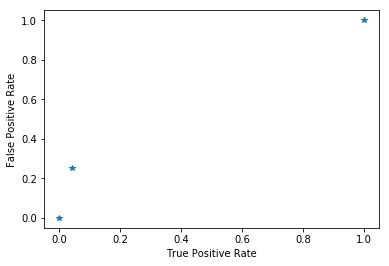

In [162]:
fpr,tpr,_=roc_curve(y_test,pred_value)
#help(roc_curve)
plt.plot(fpr,tpr,"*")
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')

# Great Job!